<a href="https://colab.research.google.com/github/ShreyasKadiri/Shopee-Price-Match-Guarantee/blob/main/shoppe_price_match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import pickle
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
#!pip install sentence-transformers

In [3]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [4]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:

!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [6]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        159           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        291           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        880           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5340           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      42656            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      11138            True  
connectx

In [7]:
!kaggle competitions download -c shopee-product-matching

shopee-product-matching.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip shopee-product-matching.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/d8fce6d90ff1c758810b2132d8d9a84e.jpg  
  inflating: train_images/d90143423d8db45b382f2dee3d01fcb1.jpg  
  inflating: train_images/d903b2ab37c0418bfeb7e6e5304b64a4.jpg  
  inflating: train_images/d905748b1f61121cdcc7ae397b97052b.jpg  
  inflating: train_images/d906df4fdf70397d4f04ef0fe6ea1fe2.jpg  
  inflating: train_images/d9074f43948053971953322ed8ddc2cf.jpg  
  inflating: train_images/d9076a1375bb05c33edd5a1f1684e1f0.jpg  
  inflating: train_images/d9093fbb00a2013aad7cbcd993d779ab.jpg  
  inflating: train_images/d90ac3ff5b7d6371c50b3ef737002084.jpg  
  inflating: train_images/d90c105714e1475c4ef930e796570749.jpg  
  inflating: train_images/d90e64bea620d6e38ffe9f35b276c192.jpg  
  inflating: train_images/d9149fbfdf8d8d197f86e0a3d2ab7584.jpg  
  inflating: train_images/d914f6199e2dbafdd4a519c48dd1a5f4.jpg  
  inflating: train_images/d9159234afcf810fa9ddc7b2d49ce707.jpg  
  inflating: train_images/d91635194d9f9

In [9]:
ls

sample_data/           shopee-product-matching.zip  test_images/  train_images/
sample_submission.csv  test.csv                     train.csv


In [21]:
train_df = pd.read_csv("train.csv")

In [22]:
train_df.head(10)

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
5,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,CELANA WANITA (BB 45-84 KG)Harem wanita (bisa...,2660605217
6,train_1802986387,00144a49c56599d45354a1c28104c039.jpg,f815c9bb833ab4c8,Jubah anak size 1-12 thn,1835033137
7,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...,1565741687
8,train_86570404,0019a3c6755a194cb2e2c12bfc63972e.jpg,ea9af4f483249972,"[LOGU] Tempelan kulkas magnet angka, tempelan ...",2359912463
9,train_831680791,001be52b2beec40ddc1d2d7fc7a68f08.jpg,e1ce953d1a70618f,BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KAN...,2630990665


In [23]:
print(len(train_df))

34250


In [24]:
print(len(train_df["label_group"].unique()))

11014


In [25]:
labelGroup_Df = train_df.groupby('label_group')

258047
Sarung celana wadimor original 100% dewasa dan anak hitam dan putih polos


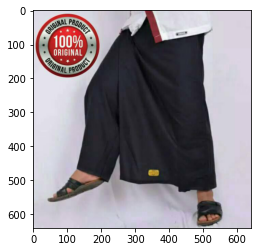

SARUNG CELANA WADIMOR DEWASA HITAM POLOS SARCEL


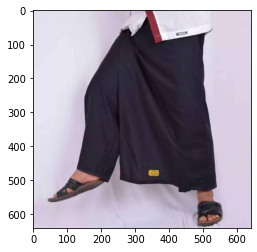

WARNA RANDOM ACAK Sarung Celana Wadimor MURAH Celana Sarung WADIMOR


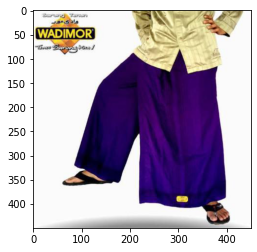

297977
Wall Sticker / WallSticker -  Submarine Measure - SK9222


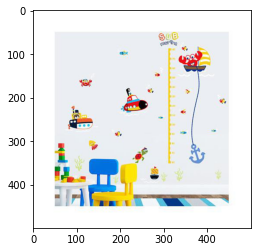

RELIZA WALL STICKER PENGUKUR TINGGI BADAN JERAPAH STIKER DINDING XL8337


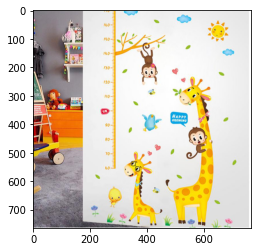

645628
GROSIR LVN COLLAGEN / COLAGEN STROBERI PEMUTIH KULIT 1 BOX ISI 10 SACHET


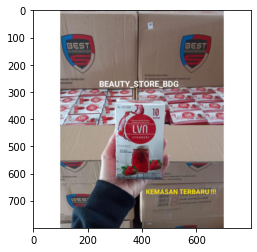

DISTRIBUTOR LVN COLLAGEN STROBERI / COLAGEN 1 BOX (10 sachet)


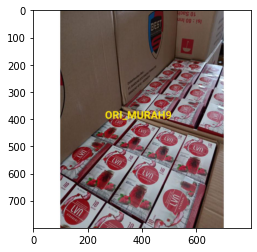

TERMURAH LVN COLLAGEN STROBERI 1 BOX 10 SACHET


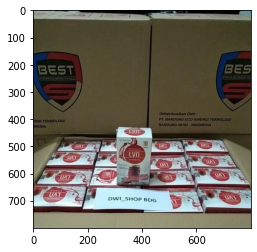

801176
mainan bayi gantung putar musik merry go round


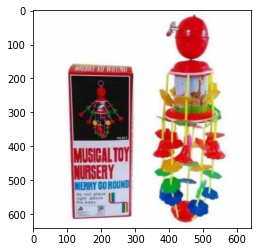

MERRY GO ROUND MAINAN BAYI GANTUNG MUSIK PUTAR/KERINCINGAN BAYI


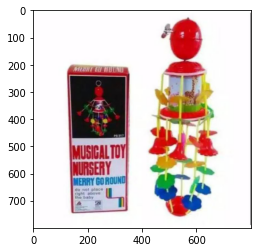

887886
TP-LINK Wireless N Router TL-WR940N 450Mbps TP LINK TL WR940N


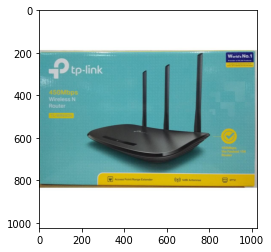

TP-LINK Wireless N Router TL-WR940N 450Mbps TP LINK


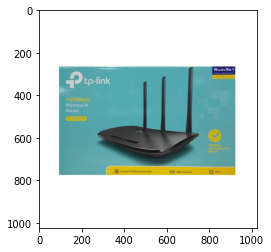

942089
Slim Door Guard Protector Pelindung Pintu Mobil Universal 8 pcs P-2


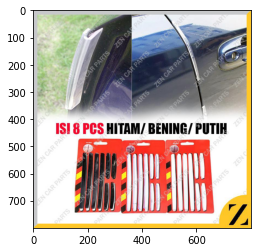

Pelindung Pintu Mobil Slim Door Guard Protector Universal 8 pcs HT-001


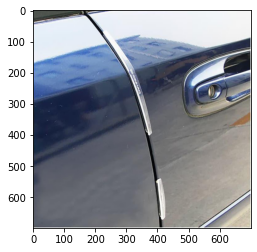

2942125
[Bayar Di Tempat]Perhiasan Bros Desain Kucing dengan Mutiara Imitasi Warna Putih untuk Wanita


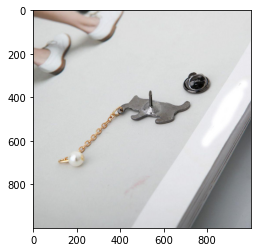

Bros Pin Bentuk Kartun Kucing Dengan Mutiara Imitasi Untuk Wanita


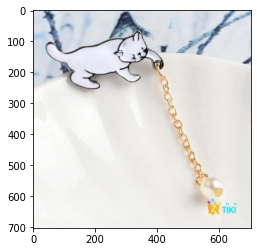

COD\xef\xbc\x88Yimi\xef\xbc\x89Kreatif Kecil Yang Lucu Putih Mutiara Kucing Bros Pins Chic Fashion Jewelry Bros


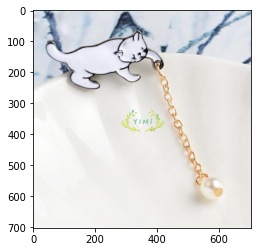

3108272
\xe2\x9c\xa8Co\xe2\x9c\xa8Sarung Jok Sepeda 3D Bahan Silikon Lembut


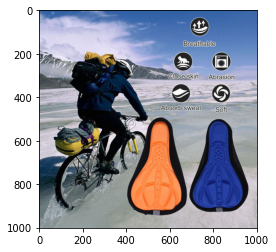

Sarung Jok Sepeda 3D Bahan Silikon Lembut


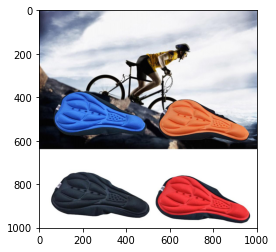

4063438
Headset U19 Hifi Macaroon Mate Color Hifi Extra Bass


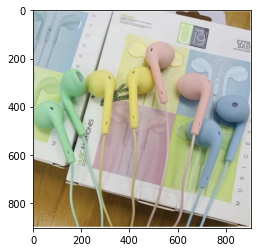

Earphone Macaron U19 VIVO


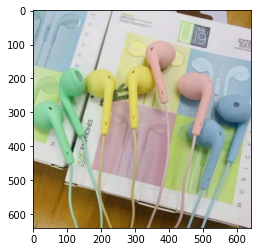

4262657
TU88 Pouch Kosmetik Bunny POMPOM Bahan Bulu Travel Pouch Cosmetic Organizer Kelinci - PBN


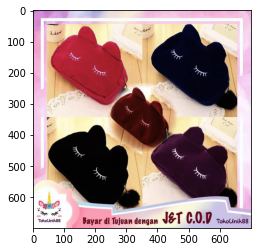

[OS821] POUCH KOSMETIK BUNNY POM POMPOM / POUCH KOSMETIK MINI / TAS KOSMETIK KECIL / POUCH KOSMETIK


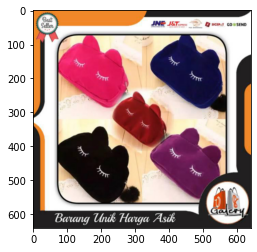

In [26]:
%matplotlib inline


groupCount = 0
for groupName,groupDf in labelGroup_Df:
    print(groupName)
    imgCount=0
    for index,row in groupDf.iterrows():
        print(row['title'])
        imagePath = 'train_images/'+row['image']
        pil_im = Image.open(imagePath, 'r')
        plt.figure()
        plt.imshow(pil_im)
        plt.show()
        imgCount= imgCount+1
        if (imgCount==3):
            break
            
    groupCount = groupCount +1
    if (groupCount==10):
        break

In [27]:
y = train_df.pop('label_group')
X = train_df

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.4,random_state=0)

In [28]:
model = SentenceTransformer('stsb-distilbert-base')
model.max_seq_length = 128

In [29]:
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
img_model = tf.keras.applications.MobileNet(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet' )

In [30]:
def get_textEmbeddings(model,text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    return text_embedding

In [31]:
def get_imageEmbeddings(model,imagePath):
    image = tf.keras.preprocessing.image.load_img(imagePath,target_size= size)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    img_embeddings = model(input_arr)
    meanImgEmb1 = np.mean(img_embeddings,axis =0)
    meanImgEmb2 = np.mean(meanImgEmb1,axis=0)
    meanImgEmb = np.mean(meanImgEmb2,axis=0)
    return meanImgEmb

In [32]:
print(np.shape(X_train))

(20550, 4)


In [ ]:
import time
text_embeddings={}
image_embeddings={}
start_time = time.time()
for index,row in  X_train.iterrows():
    txt_emb = get_textEmbeddings(model,str(row[3]))
    imagePath = 'train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    text_embeddings[row[0]] = txt_emb
    image_embeddings[row[0]] = img_emb
end_time = time.time()
print(str(end_time-start_time))

In [ ]:
with open('./textEmb','wb') as handle:
    pickle.dump(text_embeddings,handle)
with open('./imgEmb','wb') as handle:
    pickle.dump(image_embeddings,handle)

In [ ]:
keyList=[]
cembList=[]
imageList=[]
titleList=[]
for index, row in X_train.iterrows():
    #start_time=time.time()
    txt_emb = text_embeddings[row[0]]
    print(np.shape(txt_emb))
    img_emb = image_embeddings[row[0]] 
    print(np.shape(img_emb))
    cmb_emb = np.concatenate((txt_emb,img_emb),axis=0)
    print(np.shape(cmb_emb))
    norm = np.linalg.norm(cmb_emb)
    cmb_emb_normal = cmb_emb/norm
    keyList.append(row[0])
    cembList.append(cmb_emb_normal)
    imageList.append(row[1])
    titleList.append(row[3])

In [ ]:


kneigh = NearestNeighbors(n_neighbors=5,leaf_size=5000,algorithm='kd_tree')
kneigh.fit(cembList)

In [ ]:
def getNeighbours(query_emb):
    posting_id_list=[]
    neigh_dist,neigh_ind = kneigh.kneighbors(X=query_emb.reshape(1,-1), n_neighbors=5, return_distance=True)
    for ind in neigh_ind:
        #print(str(ind))
        for ind1 in ind:
            posting_id_list.append(str(ind1))
    return posting_id_list

In [ ]:
postingidList=[]
matchesList=[]
index =0
for val in keyList:
    query_emb = cembList[index]
    postingid_list = getNeighbours(query_emb)
    postingidList.append(val)
    matchesList.append(" ".join(postingid_list))
    index =index +1 
    if index==100:
        break

In [ ]:
%matplotlib inline
index =0
for item in postingidList:
    print(titleList[index])
    print(keyList[index])
    imagePath = 'train_images/'+ imageList[index]
    pil_im = Image.open(imagePath, 'r')
    plt.figure()
    plt.imshow(pil_im)
    plt.show()
    matching_indices = matchesList[index].split(' ')
    print('==================')
    for ind in matching_indices:
        print(titleList[int(ind)])
        print(keyList[int(ind)])
        imagePath = 'train_images/'+ imageList[int(ind)]
        pil_im = Image.open(imagePath, 'r')
        plt.figure()
        plt.imshow(pil_im)
        plt.show()
    index= index +1
    if index == 10:
        break
    

In [ ]:
testkeyList=[]
testcembList=[]
testimageList=[]
testtitleList=[]
for index, row in X_test.iterrows():
    #start_time=time.time()
    txt_emb = get_textEmbeddings(model,str(row[3]))
    imagePath = 'train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    text_embeddings[row[0]] = txt_emb
    image_embeddings[row[0]] = img_emb
    cmb_emb = np.concatenate((txt_emb,img_emb),axis=0)
    norm = np.linalg.norm(cmb_emb)
    cmb_emb_normal = cmb_emb/norm
    testkeyList.append(row[0])
    testcembList.append(cmb_emb_normal)
    testimageList.append(row[1])
    testtitleList.append(row[3])

In [ ]:
testpostingidList=[]
testmatchesList=[]
index =0
for val in testkeyList:
    query_emb = testcembList[index]
    postingid_list = getNeighbours(query_emb)
    testpostingidList.append(val)
    testmatchesList.append(" ".join(postingid_list))
    index =index +1 
    if index==100:
        break

In [ ]:
%matplotlib inline
index =10
while index <20:
    print(testtitleList[index])
    print(testkeyList[index])
    imagePath = 'train_images/'+ testimageList[index]
    pil_im = Image.open(imagePath, 'r')
    plt.figure()
    plt.imshow(pil_im)
    plt.show()
    matching_indices = testmatchesList[index].split(' ')
    print('==================')
    for ind in matching_indices:
        print(titleList[int(ind)])
        print(keyList[int(ind)])
        imagePath = 'train_images/'+ imageList[int(ind)]
        pil_im = Image.open(imagePath, 'r')
        plt.figure()
        plt.imshow(pil_im)
        plt.show()
    index= index +1
   
    